## Analysing Supply and Customer (Value) Chains
This notebook demonstrates how to use the get_history calls of the Access layer to build a picture of supply and customer relationships for a company. The Access layer provides a simplified interface designed for FinCoders. 

Use cases for supply and customer chain relations are:

- Fundamental Modelling
- Risk Analysis
- Equity and Bond Valuation
- ESG
- Portfolio Construction
- and many more...

#### Learn more

To learn more about the Data Library for Python please join the LSEG Developer Community. By [registering](https://developers.lseg.com/iam/register) and [logging](https://developers.lseg.com/content/devportal/en_us/initCookie.html) into the LSEG Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/learning), 
 [Documentation](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/docs)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
this [Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The LSEG Developer Community will be happy to help. 

----

## Some Imports to start with

In [2]:
import refinitiv.data as rd
from refinitiv.data.early_access.discovery import Customers, Suppliers
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Open the data session

The open_session() function creates and open sessions based on the information contained in the refinitiv-data.config.json configuration file. Please edit this file to set the session type and other parameters required for the session you want to open.

In [2]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x1777ed760 {name='workspace'}>

## Retrieve data

### Get a list of customers and suppliers for VOD.L
In the main returned dataframe we also provide adidtional information that can be used to better asses which customers (or suppliers) are more appropriate to use. For example we provide a Value chain Confidence and Freshness Score as well as the latest update date. Obviously supply chains change and you may want to only include more recent updates/confirmed relationships. 

Additionally you will see that we have also provided additional Credit ratings information on the organization - a StarMine SmartRatio Implied Rating for both public and private companues where available. This can help with assesing the strength of customer/supplier finances and money raising ability - which can impact credit risk for example. 

### Customers

In [3]:
main_ric = 'RR.L'
customers = Customers(main_ric)
customers.get_data()
customers.df

,Instrument,Organization Is Public Flag,Relationship Type,Related OrganizationID,Company Common Name,RIC,IssueISIN,CUSIP,SEDOL,Value Chains Relationship Confidence Score,Value Chain Relationship Freshness Score,Value Chains Relationship Update Date,Country of Headquarters,TRBC Industry Name,Credit SmartRatios Implied Rating,Private Company SmartRatios Implied Rating
0,RR.L,True,Customer,5035738422,Vietjet Aviation JSC,VJC.HM,VN000000VJC7,<NA>,BYP2451,0.27609,4,2021-11-04,Vietnam,Airlines,B+,
1,RR.L,True,Customer,5000001291,BAE Systems PLC,BAES.L,GB0002634946,<NA>,0263494,0.28122,5,2023-05-30,United Kingdom,Aerospace & Defense,BBB-,
2,RR.L,False,Customer,4295903494,Aviall Inc,AVL^I06,US05366B1026,05366B102,<NA>,0.282742,1,2017-06-22,United States of America,Aerospace & Defense,,<NA>
3,RR.L,False,Customer,5000704362,Beijing New Lufthansa Holdings Group Co Ltd,<NA>,<NA>,<NA>,<NA>,0.284973,3,2020-11-09,China,Investment Management & Fund Operators,<NA>,<NA>
4,RR.L,True,Customer,4295873202,Gail (India) Ltd,GAIL.NS,INE129A01019,<NA>,<NA>,0.28682,1,2019-07-31,India,Natural Gas Utilities,A-,
5,RR.L,True,Customer,4295866494,Fortum Oyj,FORTUM.HE,FI0009007132,<NA>,5579550,0.289016,5,2023-06-07,Finland,Electric Utilities,BBB-,
6,RR.L,True,Customer,4295884546,AerCap Holdings NV,AER,NL0000687663,<NA>,<NA>,0.292975,1,2018-01-23,Ireland; Republic of,Business Support Services,B,
7,RR.L,True,Customer,4295860745,Bombardier Inc,BBDb.TO,CA0977518616,097751861,BN33PL2,0.299859,5,2023-02-27,Canada,Aerospace & Defense,BB,
8,RR.L,False,Customer,4296818792,SANMAR ELECTRONICS,<NA>,<NA>,<NA>,<NA>,0.300121,1,2018-03-14,India,,<NA>,
9,RR.L,False,Customer,4295894987,British Airways PLC,BAY5YEUAM=R,<NA>,<NA>,<NA>,0.30318,2,2020-02-28,United Kingdom,Airlines,,B+


### Get the Organization PermIDs as the best identifier

In [4]:
customers.org_ids

['5035738422',
 '5000001291',
 '4295903494',
 '5000704362',
 '4295873202',
 '4295866494',
 '4295884546',
 '4295860745',
 '4296818792',
 '4295894987',
 '4295859844',
 '4295880494',
 '5000018278',
 '4295893056',
 '5000656018',
 '4295864276',
 '4295889333',
 '4295875577',
 '4296008750',
 '5001450339',
 '4295903853',
 '5042935302',
 '5000034529',
 '4295872684',
 '5000037389',
 '5000101840',
 '4296833903',
 '4295867343',
 '4296066923',
 '5036796635',
 '4295868979',
 '4295868681',
 '4295884955']

### We can also access the entire record for any customer - obviously 

In [5]:
customers[0]

Customer(instrument='RR.L', is_public=True, relationship_type='Customer', company_common_name='Vietjet Aviation JSC', related_organization_id='5035738422', value_chains_relationship_confidence_score=0.2760896, value_chain_relationship_freshness_score=4, value_chains_relationship_update_date='2021-11-04', country_of_headquarters='Vietnam', trbc_industry_name='Airlines', credit_smartratios_implied_rating='B+', private_company_smartratios_implied_rating='', document_title='Vietjet Aviation JSC, Ordinary Share, Hochiminh Stock Exchange', ric='VJC.HM', issue_isin='VN000000VJC7', sedol='BYP2451')

We can also download Geographic Revenue Data for companies

In [6]:
df1 = rd.get_data([main_ric], 
                        fields=['TR.F.GEOTotRevBizActiv(Period=FY0).SegmGeoIncl',
                                'TR.F.GEOTotRevBizActiv(Period=FY0).segmentName','TR.F.GEOTotRevBizActiv(Period=FY0)'])
df1.sort_values('Standardized Revenue - Geographic Segment', ascending=False, inplace=True)
df1.reset_index(inplace=True)
df1

,index,Instrument,Included Geographies,Segment Name,Standardized Revenue - Geographic Segment
0,21,RR.L,,,13520000000
1,18,RR.L,United States,United states,4334000000
2,9,RR.L,United Kingdom,United Kingdom,1669000000
3,3,RR.L,China (PRC),China,1246000000
4,6,RR.L,Germany,Germany,855000000
5,0,RR.L,Other European countries,Rest of Europe,601000000
6,20,RR.L,Middle East,Rest OF Middle East,575000000
7,10,RR.L,Other Asian countries,Rest of Asia,381000000
8,13,RR.L,Switzerland,Switzerland (Country),334000000
9,24,RR.L,Ireland,Ireland,328000000


In [7]:
df2 = rd.get_data([main_ric], 
                        fields=['TR.F.GEOTotRevBizActiv(Period=FY0).SegmGeoIncl',
                                'TR.F.GEOTotRevBizActiv(Period=FY0).segmentName','TR.F.GEOTotRevBizActiv(Period=FY0)'])
df2.sort_values('Standardized Revenue - Geographic Segment', ascending=False, inplace=True)
df2.reset_index(inplace=True, drop = True)
df2

,Instrument,Included Geographies,Segment Name,Standardized Revenue - Geographic Segment
0,RR.L,,,13520000000
1,RR.L,United States,United states,4334000000
2,RR.L,United Kingdom,United Kingdom,1669000000
3,RR.L,China (PRC),China,1246000000
4,RR.L,Germany,Germany,855000000
5,RR.L,Other European countries,Rest of Europe,601000000
6,RR.L,Middle East,Rest OF Middle East,575000000
7,RR.L,Other Asian countries,Rest of Asia,381000000
8,RR.L,Switzerland,Switzerland (Country),334000000
9,RR.L,Ireland,Ireland,328000000


### Asset based Geographic Risk View

We can also get a view of the geographic footprint of Assets for a company - again this can help with a multitude of Risk and monitoring use cases.

In [8]:
df3 = rd.get_data([main_ric],fields=['TR.F.GEOSegAssets(Period=FY0).SegmGeoIncl',
                              'TR.F.GEOSegAssets(Period=FY0).segmentName','TR.F.GEOSegAssets(Period=FY0)'])

df3.sort_values('Standardized Assets - Geographic Segment', ascending=False, inplace=True)
df3.reset_index(inplace=True, drop = True)
df3['Assets Pct'] = df3['Standardized Assets - Geographic Segment'].div(df3['Standardized Assets - Geographic Segment'].iloc[0])*100
df3

,Instrument,Included Geographies,Segment Name,Standardized Assets - Geographic Segment,Assets Pct
0,RR.L,,,9553000000,100.0
1,RR.L,United Kingdom,United Kingdom,5202000000,54.454098
2,RR.L,Germany,Germany,2151000000,22.516487
3,RR.L,United States,United states,1465000000,15.335497
4,RR.L,World,Other,735000000,7.693918


### We can now get countries of risk fractions for each customer
This can help build some kind of geographic risk profile

In [9]:
def chunks(l, n):
    for i in range(0,len(l),n):
        yield l[i:i+n]

In [10]:
def request_cor(org_ids, chunk_size, max_steps):

    step = 0
    cor_df = pd.DataFrame()
    org_ids = list(chunks(org_ids, chunk_size))
    for chunk in org_ids:
        while step < max_steps:
            try:
                df = rd.get_data(universe=chunk, fields=['TR.InstrumentIsActive','TR.CoRFraction','TR.CoRFraction.countryname',
                                        'TR.CoRFractionByCountry','TR.CoRFractionByCountry.ISO2Code'])
                cor_df = pd.concat([cor_df, df], axis=0)
                break
            except rd.errors.RDError as e:
                print("RDError:", e)
                step +=1 
                continue
    return cor_df

In [11]:
cor_df_custumer = request_cor(customers.org_ids, 50, 3)
cor_df_custumer

,Instrument,Instrument Is Active Flag,Countries of Risk Fraction,Country Name,Countries of Risk Fraction by Country,Country ISO2Code
0,5035738422,True,0.502976,Vietnam,0.840409,VN;CN;US;JP;IN;DE;KR;GB;FR;ID
1,5035738422,<NA>,0.130783,China,<NA>,
2,5035738422,<NA>,0.092852,United States of America,<NA>,
3,5035738422,<NA>,0.030813,Japan,<NA>,
4,5035738422,<NA>,0.024875,India,<NA>,
...,...,...,...,...,...,...
181,4295884955,<NA>,0.026716,United Kingdom,<NA>,
182,4295884955,<NA>,0.024969,Italy,<NA>,
183,4295884955,<NA>,0.019376,Russia,<NA>,
184,4295884955,<NA>,0.017271,Spain,<NA>,


Let's now aggregate the results by country

In [12]:
def aggregate_by_country(cor_df):
    
    cor_agg = {}
    for org_id in cor_df['Instrument'].unique():
        cor_df_org = cor_df.loc[cor_df['Instrument'] ==org_id]
        for row in cor_df_org.iterrows():
            if row[1]['Country Name'] in cor_agg.keys():
                cor_agg[row[1]['Country Name']].append(row[1]['Countries of Risk Fraction'])
            else:
                cor_agg[row[1]['Country Name']] = [row[1]['Countries of Risk Fraction']]
                
    if pd.NA in cor_agg:
        del cor_agg[pd.NA]
    elif '' in cor_agg:
        del cor_agg['']
        
    cor_agg = {country: {'count': len(risk_f), 'sum': sum(risk_f)} for country, risk_f in cor_agg.items()}
    
    return cor_agg

In [13]:
cor_agg_customer = aggregate_by_country(cor_df_custumer)
cor_agg_customer

{'Vietnam': {'count': 1, 'sum': 0.502976345522703},
 'China': {'count': 14, 'sum': 1.4590391299654422},
 'United States of America': {'count': 18, 'sum': 5.949454170127135},
 'Japan': {'count': 10, 'sum': 1.006125230376297},
 'India': {'count': 9, 'sum': 4.081979597240622},
 'Germany': {'count': 17, 'sum': 1.4655568613278591},
 'Korea; Republic (S. Korea)': {'count': 1, 'sum': 0.012187193726709},
 'United Kingdom': {'count': 18, 'sum': 2.824719271599102},
 'France': {'count': 17, 'sum': 0.9700437943476521},
 'Indonesia': {'count': 1, 'sum': 0.009603902123266},
 'Saudi Arabia': {'count': 1, 'sum': 0.059742214695644},
 'Qatar': {'count': 2, 'sum': 1.020815692915608},
 'Australia': {'count': 3, 'sum': 0.069182975588683},
 'Russia': {'count': 16, 'sum': 0.21843218744981102},
 'Italy': {'count': 15, 'sum': 0.68846561874066},
 'Finland': {'count': 1, 'sum': 0.533297674509298},
 'Norway': {'count': 1, 'sum': 0.168561653219901},
 'Denmark': {'count': 1, 'sum': 0.116413929662302},
 'Poland': {'

We can now get a picture of the countries of risk for customers

In [14]:
def plot_network_graph(main_node, branch_dict):
    G = nx.Graph()
    
    G.add_node(main_ric, size=30)
    
    for country, values in branch_dict.items():
        value = values.get('sum', 0)
        size = values.get('count', 0)
        G.add_node(country, size=size, value=value)
        G.add_edge(country, main_ric)
        
    sizes = [G.nodes[node]['size'] * 100 for node in G.nodes()]
    values = [G.nodes[node]['value'] for node in G.nodes() if node != main_ric]
    min_value, max_value = min(values), max(values)
    norm = plt.Normalize(vmin=min_value, vmax=max_value)
    node_colors = ["green" if node == main_ric else plt.cm.Reds(norm(G.nodes[node]['value'])) for node in G.nodes()]
    
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_size=sizes, with_labels=False, node_color=node_colors, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size = 8)
    plt.show()
    

/Users/h.aramyan/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook.py:1072:VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


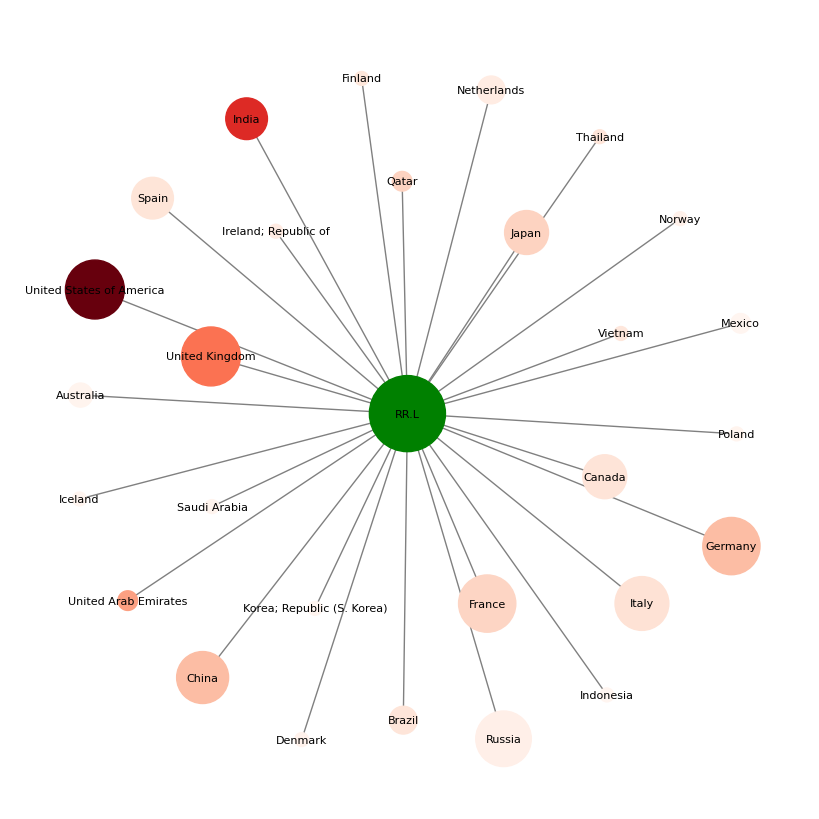

In [15]:
plot_network_graph(main_ric, cor_agg_customer)

### Suppliers

In [16]:
suppliers = Suppliers(main_ric)
suppliers.get_data()
suppliers.df

,Instrument,Organization Is Public Flag,Relationship Type,Related OrganizationID,Company Common Name,RIC,IssueISIN,CUSIP,SEDOL,Value Chains Relationship Confidence Score,Value Chain Relationship Freshness Score,Value Chains Relationship Update Date,Country of Headquarters,TRBC Industry Name,Credit SmartRatios Implied Rating,Private Company SmartRatios Implied Rating
0,RR.L,True,Supplier,4295877335,Kawasaki Heavy Industries Ltd,7012.T,JP3224200000,<NA>,6484620,0.273817,1,2018-11-23,Japan,Consumer Goods Conglomerates,BB+,
1,RR.L,True,Supplier,4295905566,ANSYS Inc,ANSS.O,US03662Q1058,03662Q105,<NA>,0.288124,5,2023-08-04,United States of America,Software,BBB-,
2,RR.L,True,Supplier,4295881202,Hanwha AeroSpace Co Ltd,012450.KS,KR7012450003,<NA>,6772671,0.288703,2,2019-11-07,Korea; Republic (S. Korea),Aerospace & Defense,BBB,
3,RR.L,False,Supplier,4296741457,Linde Advanced Material Technologies Inc,<NA>,<NA>,<NA>,<NA>,0.293416,1,2017-03-28,United States of America,Commodity Chemicals,<NA>,<NA>
4,RR.L,False,Supplier,4296650450,Ibase,<NA>,<NA>,<NA>,<NA>,0.303387,5,2024-02-15,France,Advertising & Marketing,<NA>,
5,RR.L,False,Supplier,5000698227,Noveda Technologies Inc,<NA>,<NA>,<NA>,<NA>,0.305313,1,2016-10-17,United States of America,IT Services & Consulting,<NA>,<NA>
6,RR.L,True,Supplier,4295872682,Infosys Ltd,INFY.NS,INE009A01021,<NA>,<NA>,0.305853,1,2019-03-11,India,IT Services & Consulting,AA,
7,RR.L,True,Supplier,4295861173,Magellan Aerospace Corp,MAL.TO,CA5589122004,558912200,2556987,0.306222,1,2018-02-20,Canada,Aerospace & Defense,BB+,
8,RR.L,True,Supplier,4295885156,Air New Zealand Ltd,AIR.NZ,NZAIRE0001S2,<NA>,6426484,0.306935,2,2020-02-25,New Zealand,Airlines,BBB-,
9,RR.L,False,Supplier,4297934622,Uptake Networks Inc,<NA>,<NA>,<NA>,<NA>,0.307601,1,2019-05-16,United States of America,Leisure & Recreation,<NA>,


In [17]:
suppliers.org_ids

['4295877335',
 '4295905566',
 '4295881202',
 '4296741457',
 '4296650450',
 '5000698227',
 '4295872682',
 '4295861173',
 '4295885156',
 '4297934622',
 '4295904357',
 '5000008115',
 '5037627186',
 '5001024524',
 '4297899797',
 '4295903382',
 '4295908500',
 '5079175401',
 '4295903205',
 '5000009914',
 '4295903949',
 '4295868246',
 '4295905135',
 '4295903494',
 '4295898962',
 '4295885039',
 '4296858442',
 '5067513596',
 '4295867343',
 '4295858976',
 '4295903128',
 '4295866871',
 '4295898822',
 '4295895717',
 '4295881078',
 '4295883314',
 '4296685035']

In [18]:
suppliers[0]

Supplier(instrument='RR.L', is_public=True, relationship_type='Supplier', company_common_name='Kawasaki Heavy Industries Ltd', related_organization_id='4295877335', value_chains_relationship_confidence_score=0.27381712, value_chain_relationship_freshness_score=1, value_chains_relationship_update_date='2018-11-23', country_of_headquarters='Japan', trbc_industry_name='Consumer Goods Conglomerates', credit_smartratios_implied_rating='BB+', private_company_smartratios_implied_rating='', document_title='Kawasaki Heavy Industries Ltd, Ordinary Share, Tokyo Stock Exchange', ric='7012.T', issue_isin='JP3224200000', sedol='6484620')

### Get countries of risk fractions for each supplier
This can help build some kind of geographic risk profile - so for example we can aggregate country exposure across their whole supply chain - and this can be very important to assess potential supply chain disruption in case of conflict, political instability and or labour disputes etc. 

In [19]:
cor_df_suppliers = request_cor(suppliers.org_ids, 50, 3)
cor_df_suppliers

,Instrument,Instrument Is Active Flag,Countries of Risk Fraction,Country Name,Countries of Risk Fraction by Country,Country ISO2Code
0,4295877335,True,0.697901,Japan,0.92715,JP;US;CN;IN;DE;GB;FR;CA;BR;RU
1,4295877335,<NA>,0.144707,United States of America,<NA>,
2,4295877335,<NA>,0.043503,China,<NA>,
3,4295877335,<NA>,0.008274,India,<NA>,
4,4295877335,<NA>,0.007678,Germany,<NA>,
...,...,...,...,...,...,...
212,4296685035,<NA>,0.028064,China,<NA>,
213,4296685035,<NA>,0.013932,France,<NA>,
214,4296685035,<NA>,0.010275,Italy,<NA>,
215,4296685035,<NA>,0.007107,Spain,<NA>,


We can now get a picture of the countries of risk in the supply chain. 

In [20]:
cor_agg_suppliers = aggregate_by_country(cor_df_suppliers)
cor_agg_suppliers

{'Japan': {'count': 16, 'sum': 0.8554102897516789},
 'United States of America': {'count': 27, 'sum': 12.325520045493523},
 'China': {'count': 17, 'sum': 0.627484630586922},
 'India': {'count': 14, 'sum': 1.208680065022328},
 'Germany': {'count': 19, 'sum': 0.703912817956322},
 'United Kingdom': {'count': 20, 'sum': 3.563685253907697},
 'France': {'count': 20, 'sum': 2.2425768078938204},
 'Canada': {'count': 18, 'sum': 0.9136135819211189},
 'Brazil': {'count': 2, 'sum': 0.013124858640812},
 'Russia': {'count': 17, 'sum': 0.16122757404587001},
 'Korea; Republic (S. Korea)': {'count': 4, 'sum': 1.7817098816712398},
 'Italy': {'count': 14, 'sum': 0.16980342496191703},
 'Spain': {'count': 7, 'sum': 0.089344025526533},
 'Netherlands': {'count': 4, 'sum': 0.045743551891351},
 'Switzerland': {'count': 2, 'sum': 0.017136517555049},
 'New Zealand': {'count': 1, 'sum': 0.805924170616114},
 'Australia': {'count': 1, 'sum': 0.064204813094344},
 'Indonesia': {'count': 1, 'sum': 0.001988526296708},


/Users/h.aramyan/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook.py:1072:VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


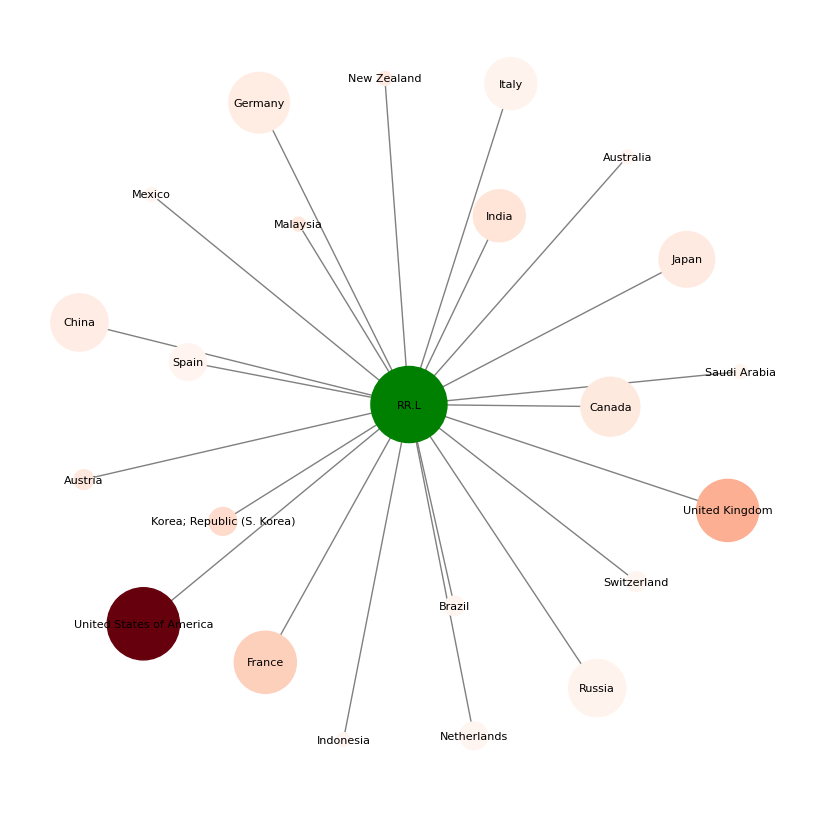

In [21]:
plot_network_graph(main_ric, cor_agg_suppliers)

### Close the session

In [87]:
rd.close_session()